In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
seoul = pd.read_csv("seoul_air_20130301-20170228.csv")
seoul


,MSRDT,MSRSTE_NM,NO2,O3,CO,SO2,PM10,PM25
0,201303012300,영등포구,0.021,0.030,0.7,0.005,45.0,20.0
1,201303012300,성북구,0.014,0.034,0.3,0.004,38.0,15.0
2,201303012300,동대문구,0.016,0.033,0.4,0.006,38.0,18.0
3,201303012300,구로구,0.021,0.027,0.4,0.005,43.0,21.0
4,201303012300,강서구,0.018,0.035,0.3,0.006,43.0,17.0
...,...,...,...,...,...,...,...,...
872896,201702280000,종로구,0.063,0.002,0.7,0.004,29.0,18.0
872897,201702280000,강동구,0.064,0.002,0.7,0.005,37.0,23.0
872898,201702280000,중구,0.060,0.003,0.4,0.004,22.0,14.0
872899,201702280000,강남구,0.053,0.006,0.4,0.006,34.0,21.0


In [2]:
#서울 데이터 onehotencoding for MSRSTE_NM
ohe = OneHotEncoder()
Nm_oh = ohe.fit_transform(seoul["MSRSTE_NM"].values.reshape(-1,1)).toarray()
seoul_oh = seoul.copy()
Nm_oh = pd.DataFrame(Nm_oh,columns=ohe.categories_[0])
Nm_oh
seoul_oh.drop(columns="MSRSTE_NM",inplace=True)
seoul_oh = pd.concat([seoul_oh,Nm_oh],axis=1)
date_s=seoul_oh["MSRDT"].astype(str)
seoul_oh["season"]=date_s.str[4:6]

change_value_dict={'01':'winter','02':'winter','03':'spring','04':'spring','05':'spring','06':'summer','07':'summer','08':'summer','09':'autumn','10':'autumn','11':'winter','12':'winter'}

seoul_oh=seoul_oh.replace({'season':change_value_dict})
seoul["season"]=date_s.str[4:6]

seoul=seoul.replace({'season':change_value_dict})



,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
872897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
872899,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
std_seoul = pd.DataFrame(StandardScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
mm_seoul = pd.DataFrame(MinMaxScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
ma_seoul = pd.DataFrame(MaxAbsScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)
rb_seoul = pd.DataFrame(RobustScaler().fit_transform(seoul_oh.iloc[:,1:7]),columns=seoul_oh.iloc[:,1:7].columns)



In [4]:
col = seoul_oh.iloc[:,1:7].columns.append(seoul_oh.drop(columns=std_seoul.columns).columns)

std_seoul = pd.concat([std_seoul,seoul_oh.drop(columns=std_seoul.columns)],axis=1,ignore_index = True)
mm_seoul = pd.concat([mm_seoul,seoul_oh.drop(columns=mm_seoul.columns)],axis=1,ignore_index = True)
ma_seoul = pd.concat([ma_seoul,seoul_oh.drop(columns=ma_seoul.columns)],axis=1,ignore_index = True)
rb_seoul = pd.concat([rb_seoul,seoul_oh.drop(columns=rb_seoul.columns)],axis=1,ignore_index = True)
std_seoul.columns=col
mm_seoul.columns=col
ma_seoul.columns=col
rb_seoul.columns=col

std_seoul

,NO2,O3,CO,SO2,PM10,PM25,MSRDT,강남구,강동구,강북구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,season
0,-0.609132,0.401441,0.705679,-0.075234,0.007840,-0.140831,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,spring
1,-1.011489,0.613121,-0.771591,-0.506737,-0.193438,-0.320985,201303012300,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
2,-0.896530,0.560201,-0.402274,0.356270,-0.193438,-0.212893,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
3,-0.609132,0.242681,-0.402274,-0.075234,-0.049668,-0.104800,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
4,-0.781571,0.666041,-0.771591,0.356270,-0.049668,-0.248923,201303012300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872896,1.805011,-1.080317,0.705679,-0.506737,-0.452224,-0.212893,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,winter
872897,1.862490,-1.080317,0.705679,-0.075234,-0.222192,-0.032739,201702280000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter
872898,1.632572,-1.027397,-0.402274,-0.506737,-0.653502,-0.357015,201702280000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,winter
872899,1.230215,-0.868637,-0.402274,0.356270,-0.308454,-0.104800,201702280000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,winter


In [5]:
std_kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
std_encoded=std_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
std_kmeans.fit(std_encoded)

mm_kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
mm_encoded=mm_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
mm_kmeans.fit(mm_encoded)


ma_kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
ma_encoded=ma_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
ma_kmeans.fit(ma_encoded)


rb_kmeans=KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
rb_encoded=rb_seoul[['NO2','O3','CO','SO2','PM10','PM25']]
rb_kmeans.fit(rb_encoded)


KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

In [6]:
std_predict= pd.DataFrame(std_kmeans.predict(std_encoded),columns=['cluster'])
std_encoded=pd.concat([std_encoded,std_predict],axis=1)
std_kmeans.labels_=std_kmeans.labels_+1

mm_predict= pd.DataFrame(mm_kmeans.predict(mm_encoded),columns=['cluster'])
mm_encoded=pd.concat([mm_encoded,mm_predict],axis=1)
mm_kmeans.labels_=mm_kmeans.labels_+1

ma_predict= pd.DataFrame(ma_kmeans.predict(ma_encoded),columns=['cluster'])
ma_encoded=pd.concat([ma_encoded,ma_predict],axis=1)
ma_kmeans.labels_=ma_kmeans.labels_+1

rb_predict= pd.DataFrame(rb_kmeans.predict(rb_encoded),columns=['cluster'])
rb_encoded=pd.concat([rb_encoded,rb_predict],axis=1)
rb_kmeans.labels_=rb_kmeans.labels_+1



In [7]:
for i in range(7,32):
    index_tmp = std_seoul.index[std_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    std_seoul.iloc[index_tmp, i] = std_kmeans.labels_[index_tmp].tolist()
    
for i in range(7,32):
    index_tmp = mm_seoul.index[mm_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    mm_seoul.iloc[index_tmp, i] = mm_kmeans.labels_[index_tmp].tolist()

for i in range(7,32):
    index_tmp = ma_seoul.index[ma_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    ma_seoul.iloc[index_tmp, i] = ma_kmeans.labels_[index_tmp].tolist()
    
for i in range(7,32):
    index_tmp = rb_seoul.index[rb_seoul[col[i]] == 1]
    #print(np.unique(kmeans.labels_[index_tmp].tolist()))
    rb_seoul.iloc[index_tmp, i] = rb_kmeans.labels_[index_tmp].tolist()

In [8]:

sum_stb=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = std_seoul.index[std_seoul[col[i]]!=0]
    sum_stb[i-7] = sum_stb[i-7]+std_seoul.iloc[index_tmp, i]

sum_mm=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = mm_seoul.index[mm_seoul[col[i]]!=0]
    sum_mm[i-7] = sum_mm[i-7]+mm_seoul.iloc[index_tmp, i]

sum_ma=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = ma_seoul.index[ma_seoul[col[i]]!=0]
    sum_ma[i-7] = sum_ma[i-7]+ma_seoul.iloc[index_tmp, i]

sum_rb=np.zeros(25,dtype=object)
for i in range(7,32):
    index_tmp = rb_seoul.index[rb_seoul[col[i]]!=0]
    sum_rb[i-7] = sum_rb[i-7]+rb_seoul.iloc[index_tmp, i]

#for i in range(25):
#    print(sum1[i].sum()/sum1[i].size)
#print(sum1[1].name)

In [9]:
def cal(temparray):
    for i in range(len(temparray)):
        for j in range(len(temparray)-i-1):
            if temparray[j]>temparray[j+1]:
                temp=temparray[j]
                temparray[j]=temparray[j+1]
                temparray[j+1]=temp
    return temparray

In [10]:
def compare(tmp1,tmp2):
    resultarray=np.zeros(len(tmp1))
    for i in range(len(tmp1)):
        for j in range(len(tmp1)):
            if tmp1[i]==tmp2[j]:
                resultarray[i]=j
                continue
    return resultarray    
            
        

In [11]:
def setting(tmp):
    sizenum=round(len(tmp)/4)
    for i in range(len(tmp)):
        if tmp[i]<sizenum:
            tmp[i]=0
        elif tmp[i]<sizenum*2:
            tmp[i]=1
        elif tmp[i]<sizenum*3:
            tmp[i]=2
        else:
            tmp[i]=3
            
            

In [12]:
tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_stb[i].name
    tmp_array_size[i]=sum_stb[i].sum()/sum_stb[i].size
std_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_std=compare(tmp_array_size,tmp2)
setting(fnl_std)
std_seoul_df['cluster']=fnl_std
std_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_mm[i].name
    tmp_array_size[i]=sum_mm[i].sum()/sum_stb[i].size
mm_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_mm=compare(tmp_array_size,tmp2)
setting(fnl_mm)
mm_seoul_df['cluster']=fnl_mm
mm_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_ma[i].name
    tmp_array_size[i]=sum_ma[i].sum()/sum_ma[i].size
ma_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_ma=compare(tmp_array_size,tmp2)
setting(fnl_ma)
ma_seoul_df['cluster']=fnl_ma
ma_seoul_df

tmp_array_name=np.zeros(25,dtype=object)
tmp_array_size=np.zeros(25,dtype=object)
for i in range(0,25):
    tmp_array_name[i]=sum_rb[i].name
    tmp_array_size[i]=sum_rb[i].sum()/sum_rb[i].size
rb_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)

tmp2=tmp_array_size.copy()
cal(tmp2)
fnl_rb=compare(tmp_array_size,tmp2)
setting(fnl_rb)
rb_seoul_df['cluster']=fnl_rb
rb_seoul_df

array([2.344317014720986, 2.3588770648483637, 2.370739082066349,
       2.3782285714285716, 2.392119379137183, 2.392634280048988,
       2.40110535208041, 2.407262442146163, 2.407280317977753,
       2.4094890302701777, 2.4236905951191665, 2.4245304561283323,
       2.4330261618784057, 2.4348520726940746, 2.454553341623529,
       2.4686314560840383, 2.473095517349887, 2.482128084438739,
       2.4979708488139467, 2.5112945140931546, 2.5232445105215007,
       2.5434962717481358, 2.551924473493101, 2.5627127370498557,
       2.6214835948644795], dtype=object)

,Mean value,cluster
강남구,2.42369,1.0
강동구,2.34432,0.0
강북구,2.55192,3.0
강서구,2.52324,3.0
관악구,2.40949,1.0
광진구,2.40726,1.0
구로구,2.51129,3.0
금천구,2.39263,0.0
노원구,2.56271,3.0
도봉구,2.62148,3.0


array([2.7272156415013558, 2.730763723833796, 2.7351002824455795,
       2.742838393060945, 2.757553279507004, 2.7593522030930844,
       2.760070752025562, 2.766711363441842, 2.768794042965964,
       2.7695341526150328, 2.77317847641388, 2.776584195188846,
       2.781277665134078, 2.785356038957252, 2.7894, 2.791255611792628,
       2.795293110825845, 2.796797396814523, 2.7995550104116154,
       2.7996338777494922, 2.8023077590445067, 2.809440813362382,
       2.813586459286368, 2.833409415121255, 2.868239865154415],
      dtype=object)

,Mean value,cluster
강남구,2.72722,0.0
강동구,2.76007,1.0
강북구,2.80944,3.0
강서구,2.81359,3.0
관악구,2.76879,1.0
광진구,2.77658,1.0
구로구,2.78128,2.0
금천구,2.78536,2.0
노원구,2.79963,3.0
도봉구,2.83341,3.0


array([2.7263593549307834, 2.7308782680908337, 2.7347864540241362,
       2.7427242638666973, 2.7574962197940143, 2.759264662970528,
       2.760241926280954, 2.7662263558814297, 2.7688196627607886,
       2.7691649311003967, 2.7732356895614614, 2.7762413576367067,
       2.7815346831538967, 2.7850644427596665, 2.7892571428571427,
       2.790540733750822, 2.7954927970332335, 2.7966832220129016,
       2.7996052744486715, 2.799697635279687, 2.8020185661817867,
       2.810254175744372, 2.813700823421775, 2.83320970042796,
       2.867925606376596], dtype=object)

,Mean value,cluster
강남구,2.72636,0.0
강동구,2.76024,1.0
강북구,2.81025,3.0
강서구,2.8137,3.0
관악구,2.76916,1.0
광진구,2.77624,1.0
구로구,2.78153,2.0
금천구,2.78506,2.0
노원구,2.79961,3.0
도봉구,2.83321,3.0


array([2.8821716926763856, 2.908847108499044, 2.9146271729185727,
       2.9388231177465447, 2.947225633263843, 2.9528364021648863,
       2.971734781366105, 2.973446162824628, 3.007285714285714,
       3.008220351077494, 3.0108132848928686, 3.019289163943434,
       3.0287749206258403, 3.0472963312458896, 3.0473825426728323,
       3.067214424283921, 3.0694052203679933, 3.070326096259736,
       3.070713409590096, 3.075624250042855, 3.0804256654589026,
       3.136918687589158, 3.1507361333028987, 3.158843527697626,
       3.1799564270152505], dtype=object)

,Mean value,cluster
강남구,3.00822,1.0
강동구,3.06721,2.0
강북구,3.17996,3.0
강서구,2.91463,0.0
관악구,2.88217,0.0
광진구,3.07562,3.0
구로구,2.94723,0.0
금천구,2.93882,0.0
노원구,3.02877,2.0
도봉구,3.13692,3.0


In [13]:
DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
          'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))
    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                              float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
              (not farthest and
               distances[i, ii] < cluster_distances[labels[i], labels[ii]])
              or
              (farthest and
               distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                      diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
              diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                  labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters


def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    labels = LabelEncoder().fit(labels).transform(labels)

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))

    return min_distance / max_diameter


for diameter_method in DIAMETER_METHODS:
    for cdist_method in CLUSTER_DISTANCE_METHODS:
        dund = dunn(std_seoul_df["cluster"], d, diameter_method, cdist_method)
        dunk = dunn(std_kmeans.predict(std_seoul_df["Mean Value"]), d, diameter_method, cdist_method)
        print(diameter_method, cdist_method, dund, dunk)

NameError: name 'd' is not defined

In [ ]:
rb_kmeans.labels_
mm_kmeans.labels_
ma_kmeans.labels_
std_kmeans.labels_


In [ ]:
max=seoul_oh["SO2"].max()

seoul=seoul[seoul.PM10<50]

seoul
    
seoul['PM10'].max()

Text(0.5, 1.0, 'Scatter Plot')

Text(0.5, 0, 'PM10')

Text(0, 0.5, 'O3')

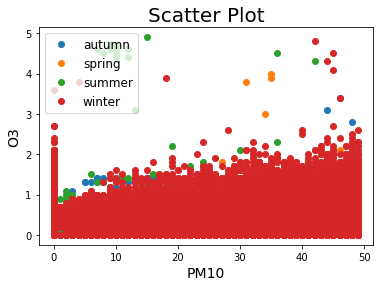

In [52]:
groups=seoul.groupby('season')

fig,  ax=plt.subplots()

for name,group in  groups:
    ax.plot(group.PM10,group.CO,marker='o',linestyle='',label=name)
    
ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot', fontsize=20)

plt.xlabel('PM10', fontsize=14)

plt.ylabel('O3', fontsize=14)

plt.show()



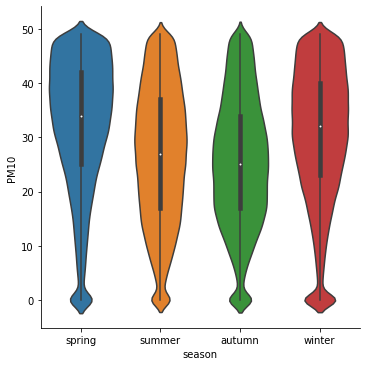

In [53]:
sns.catplot(data= seoul, x= 'season', y= 'PM10', kind= 'violin')

In [54]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins

In [55]:
state_geo = 'TL_SCCO_SIG_WGS84.json'
state_geo2 = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [56]:
json_data=open(state_geo).read()
jsonResult = json.loads(json_data)



def points_array(points):

    final_points = []

    for x in range(0, len(points)):

        if len(points[x]) == 2:
            final_points.append(points[x])
        else:
            target = points[x]
            for y in range(0, len(target)):
                final_points.append(target[y])

    return final_points

center_locations = pd.DataFrame()
codes = []
names = []
x_list = []
y_list = []
for x in range(0, len(jsonResult['features'])):
    code = jsonResult['features'][x]['properties']['SIG_CD']
    name = jsonResult['features'][x]['properties']['SIG_KOR_NM']
    # 중앙값 생성
    points = jsonResult['features'][x]['geometry']['coordinates'][0]
    points = points_array(points)
    points_df = pd.DataFrame(points)
    points_df.columns = ['x','y']
    x = points_df.x
    y = points_df.y
    X = (x[1]+x[2])/2
    Y = (y[1]+y[2])/2

    # 결과
    codes.append(code)
    names.append(name)
    x_list.append(X)
    y_list.append(Y)

# 데이터 프레임 생성
center_locations['CODE'] = codes
center_locations['NAME'] = names
center_locations['X'] = x_list
center_locations['Y'] = y_list


In [57]:
temp_seoulmap_std=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_stb[i].name
    tmp_array_size[i]=sum_stb[i].sum()/sum_stb[i].size
std_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_std['VALUE']=fnl_std
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_std,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_std,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                             
temp_seoulmap_mm=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_mm[i].name
    tmp_array_size[i]=sum_mm[i].sum()/sum_mm[i].size
mm_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_mm['VALUE']=fnl_mm
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_mm,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_mm,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                                                     
temp_seoulmap_ma=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_ma[i].name
    tmp_array_size[i]=sum_ma[i].sum()/sum_ma[i].size
ma_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_ma['VALUE']=fnl_ma
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_ma,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_ma,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m


temp_seoulmap_rb=pd.DataFrame({'NAME':tmp_array_name})
for i in range(0,25):
    tmp_array_name[i]=sum_rb[i].name
    tmp_array_size[i]=sum_rb[i].sum()/sum_rb[i].size
rb_seoul_df=pd.DataFrame({'Mean value':tmp_array_size},index=tmp_array_name)


temp_seoulmap_rb['VALUE']=fnl_rb
center_locations2 = center_locations[center_locations['Y'] >= 37.426026]
target_df = pd.merge(temp_seoulmap_rb,center_locations2, how = 'left', on = 'NAME')
target_df = target_df.dropna(axis=0, subset=['X','Y'])
                             
m=folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

m.choropleth(
    geo_data=state_geo2,
    name='미세먼지 위험군',
    data=temp_seoulmap_rb,
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'income'
)

# I can add marker one by one on the map
for i in range(0,len(target_df)):
    latitude = target_df.iloc[i]['Y']
    longitude = target_df.iloc[i]['X']
    location=(latitude, longitude)

    if target_df.iloc[i]['NAME'] in ['서초구','강남구'] :
        color = 'white'
    else:
        color = '#3186cc'

    folium.CircleMarker(location, radius=10,color=color,fill_color=color,fill_opacity = 0.1, opacity=0.0,  popup=target_df.iloc[i]['NAME'] + "\n" + str(int(round(target_df.iloc[i]['VALUE']/10000,0))) + "만원").add_to(m)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
m.save('kr_incode.html')
# webbrowser.open_new("folium_kr.html")
m
                             

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
